In [1]:
import os
import numpy as np
import pandas as pd
from utils.feature_extractor_utils import *
from utils.utils import *
import librosa

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
batch_size = 64
nb_feat = 34
nb_class = 4
nb_epoch = 80

optimizer = 'Adadelta'

In [3]:
params = Constants()
print(params)

----------------------------------------------------------------------------------------------------
available_emotions            ['ang' 'exc' 'neu' 'sad']                                             
conf_matrix_prefix            iemocap                                                               
framerate                     16000                                                                 
path_to_data                  /Users/user/Desktop/git/Personal/FB_react.bot/data/                   
path_to_features              /Users/user/Desktop/git/Personal/FB_react.bot/data/features/          
sessions                      ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']          
types                         {1: <class 'numpy.int8'>, 2: <class 'numpy.int16'>, 4: <class 'numpy.i
----------------------------------------------------------------------------------------------------


In [4]:
data = read_iemocap_data(params=params)

In [5]:
# get files
file_list = []
for i, thing in enumerate(data):
    file_name = thing['id']
    sess_num = file_name[4]
    directory = f"../data/Session{sess_num}/sentences/wav/"+ "_".join(file_name.split("_")[:2]) + "/"
    
    file_list.append(directory + file_name + ".wav")

# 01. extract features

In [6]:
sampling_rate = 16000
n_fft_rate = 0.2 #200ms
hop_length_rate = 0.1 #100ms
max_length = 78

In [17]:
# extract and save feature
labels = []
features = []
for i, content in enumerate(data):
    file_name = content['id']
    sess_num = file_name[4]
    directory = f"../data/Session{sess_num}/sentences/wav/"+ "_".join(file_name.split("_")[:-1]) + "/"
    full_file_name = directory + file_name + ".wav"
    
    extracted_feature = feature_generator(full_file_name, sampling_rate, n_fft_rate, hop_length_rate, max_length)
    
    features.append(extracted_feature)
    labels.append(content["emotion"])

/Users/user/opt/anaconda3/envs/torch_py36/lib/python3.6/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [24]:
print("label length:", len(labels))
print("features_shape:", np.array(features).shape)

label length: 4936
features_shape: (4936, 30, 78)


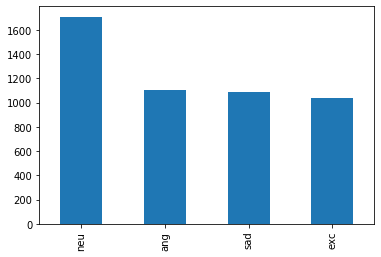

In [23]:
pd.Series(labels).value_counts().plot(kind="bar")

In [26]:
# save
np.save("../data/feature_array/labels.npy", np.array(labels))
np.save("../data/feature_array/audio_features.npy", np.array(features))